In [184]:
%pip install imblearn
%pip install pandas
%pip install matplotlib
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

data = pd.read_csv("Data/lymphography.csv")

data.head()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\rafael\appdata\local\programs\python\python312\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


#### 1. Identificação do atributo alvo (saída);

In [185]:
data["class"]
class_quantidade = data["class"].value_counts()

print(data["class"].describe());
print(class_quantidade)

count    148.000000
mean       2.452703
std        0.575396
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: class, dtype: float64
class
2    81
3    61
4     4
1     2
Name: count, dtype: int64


#### 2. Identificação dos tipos de dados dos atributos de entrada (quantitativo, qualitativo);

1. class: alvo
2. lymphatics: qualitativo
3. block of affere: qualitativo
4. bl. of lymph. c: qualitativo
5. bl. of lymph. s: qualitativo
6. by pass: qualitativo
7. extravasates: qualitativo
8. regeneration of: qualitativo
9. early uptake in: qualitativo
10. lym.nodes dimin: quantitativos
11. lym.nodes enlar: quantitativos
12. changes in lym.: qualitativo
13. defect in node: qualitativo
14. changes in node: qualitativo
15. changes in stru: qualitativo
16. special forms: qualitativo
17. dislocation of: qualitativo
18. exclusion of no: qualitativo
19. no. of nodes in: quantitativo


#### 3. Identificação da escala de dados dos atributos de entrada (nominal, ordinal, intervalar, racional);

1. class: alvo
2. lymphatics: ordinal
3. block of affere: nominal
4. bl. of lymph. c: nominal
5. bl. of lymph. s: nominal
6. by pass: nominal
7. extravasates: nominal
8. regeneration of: nominal
9. early uptake in: nominal
10. lym.nodes dimin: racional
11. lym.nodes enlar: racional
12. changes in lym.: ordinal
13. defect in node: nominal
14. changes in node: ordinal
15. changes in stru: ordinal
16. special forms: nominal
17. dislocation of: nominal
18. exclusion of no: nominal
19. no. of nodes in: racional

#### 4. Exploração dos dados através de medidas de localidade;

In [186]:


#MEDIA
mediaLymNodesDimin = data["lym.nodes dimin"].mean();
mediaLymNodesEnlar = data["lym.nodes enlar"].mean();
mediaNoOfNodes = data["no. of nodes in"].mean();

#MEDIANA
medianaLymNodesDimin = data["lym.nodes dimin"].median();
medianaLymNodesEnlar = data["lym.nodes enlar"].median();
medianaNoOfNodes = data["no. of nodes in"].median();

#MODAS
modaLymNodesDimin = data["lym.nodes dimin"].mode().iloc[0];
modaLymNodesEnlar = data["lym.nodes enlar"].mode().iloc[0];
modaNoOfNodes = data["no. of nodes in"].mode().iloc[0];


print("Medias: ")
print("Lym Nodes Dimin: {:.2f}".format(mediaLymNodesDimin))
print("Lym Nodes Enlar: {:.2f}".format(mediaLymNodesEnlar))
print("No. of Nodes in: {:.2f}".format(mediaNoOfNodes))

print("Medianas: ")
print("Lym Nodes Dimin: {:.2f}".format(medianaLymNodesDimin))
print("Lym Nodes Enlar: {:.2f}".format(medianaLymNodesEnlar))
print("No. of Nodes in: {:.2f}".format(medianaNoOfNodes))

print("Moda: ")
print("Lym Nodes Dimin: {:n}".format(modaLymNodesDimin))
print("Lym Nodes Enlar: {:n}".format(modaLymNodesEnlar))
print("No. of Nodes in: {:n}".format(modaNoOfNodes))


Medias: 
Lym Nodes Dimin: 1.06
Lym Nodes Enlar: 2.47
No. of Nodes in: 2.60
Medianas: 
Lym Nodes Dimin: 1.00
Lym Nodes Enlar: 2.00
No. of Nodes in: 2.00
Moda: 
Lym Nodes Dimin: 1
Lym Nodes Enlar: 2
No. of Nodes in: 1


#### 5. Exploração dos dados através de medidas de espalhamento;

In [187]:
medidas_espalhamento = data.loc[:, data.columns != 'class'].agg(['min', 'max', 'var', 'std', 'median', 'quantile']).T

interquartil = data.loc[:, data.columns != 'class'].quantile(0.75) - data.loc[:, data.columns != 'class'].quantile(0.25)

medidas_espalhamento["INQR"] = interquartil

medidas_espalhamento

,min,max,var,std,median,quantile,INQR
lymphatics,1.0,4.0,0.668321,0.817509,3.0,3.0,1.0
block of affere,1.0,2.0,0.248759,0.498757,2.0,2.0,1.0
bl. of lymph. c,1.0,2.0,0.145799,0.381836,1.0,1.0,0.0
bl. of lymph. s,1.0,2.0,0.045367,0.212995,1.0,1.0,0.0
by pass,1.0,2.0,0.185328,0.430498,1.0,1.0,0.0
extravasates,1.0,2.0,0.251655,0.501652,2.0,2.0,1.0
regeneration of,1.0,2.0,0.063431,0.251855,1.0,1.0,0.0
early uptake in,1.0,2.0,0.210333,0.458621,2.0,2.0,1.0
lym.nodes dimin,1.0,3.0,0.098318,0.313557,1.0,1.0,0.0
lym.nodes enlar,1.0,4.0,0.699945,0.836627,2.0,2.0,1.0


#### 6. Exploração dos dados através de medidas de distribuição;

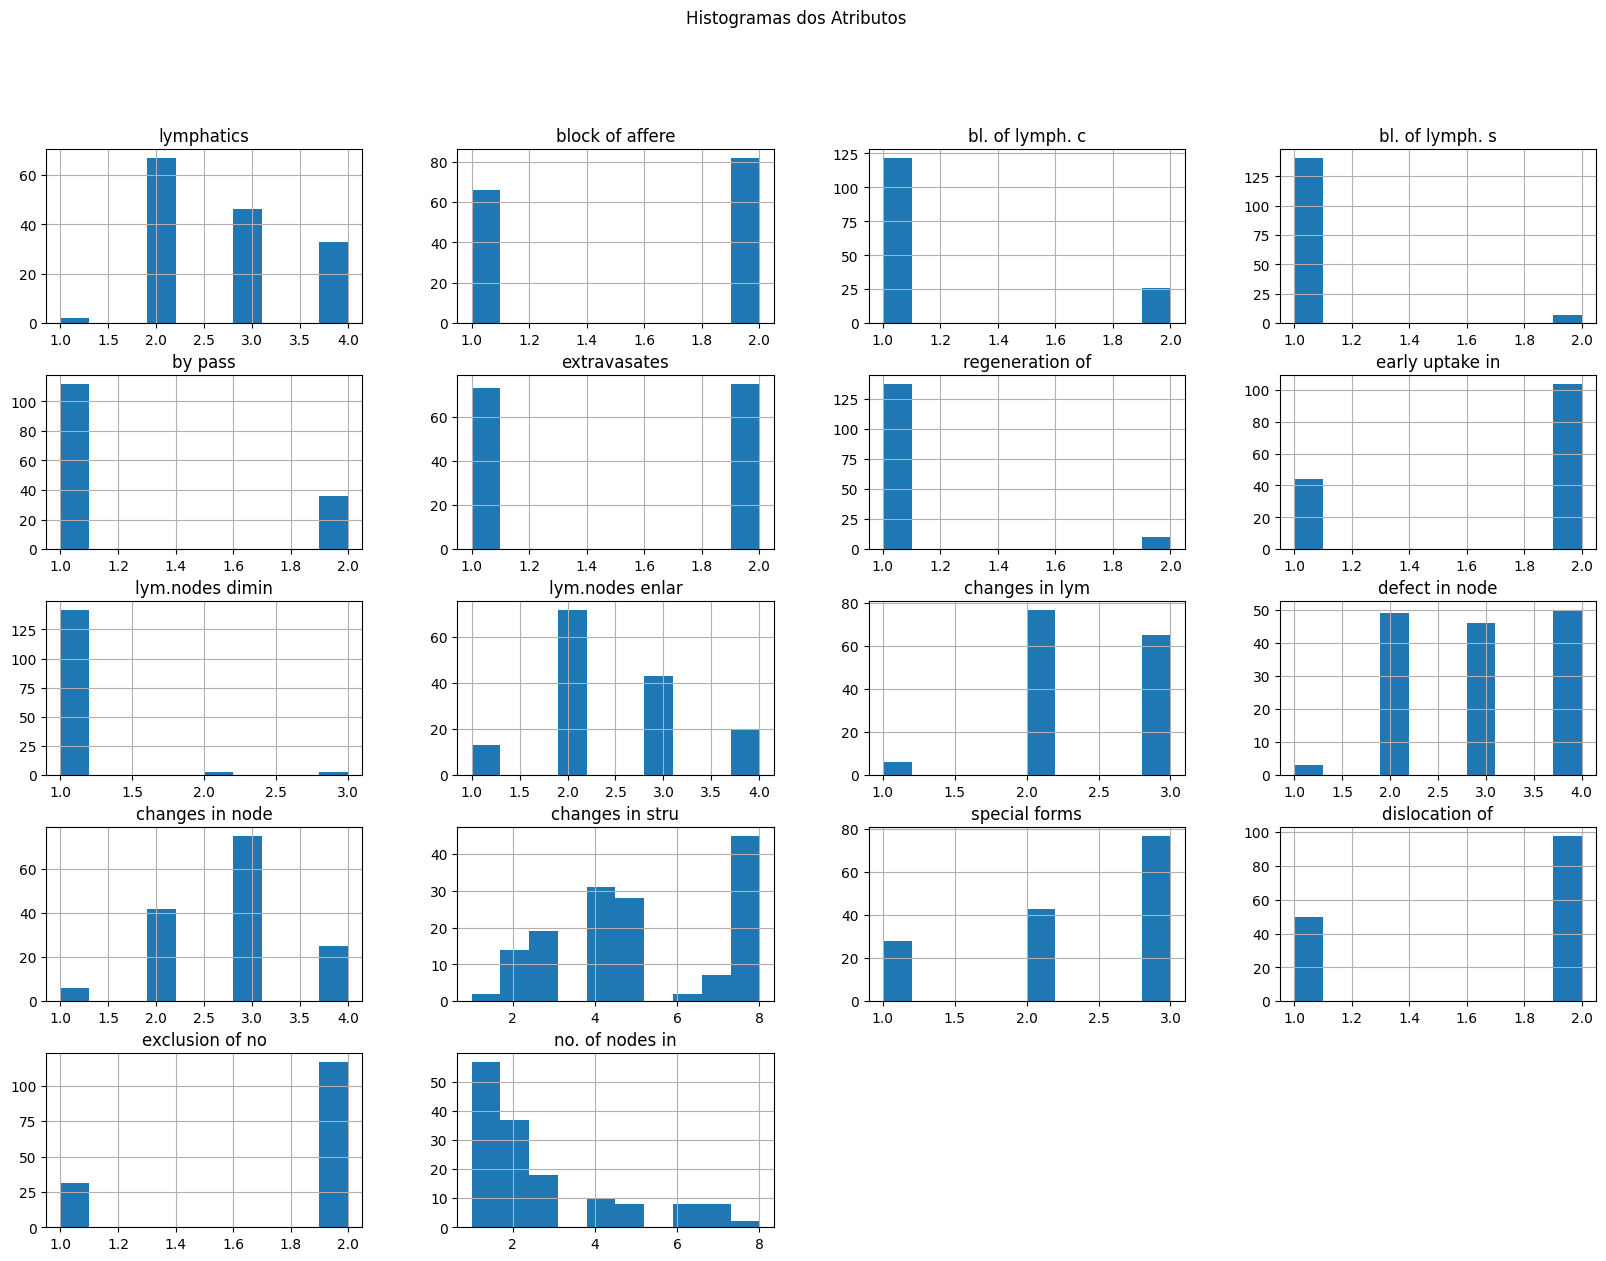

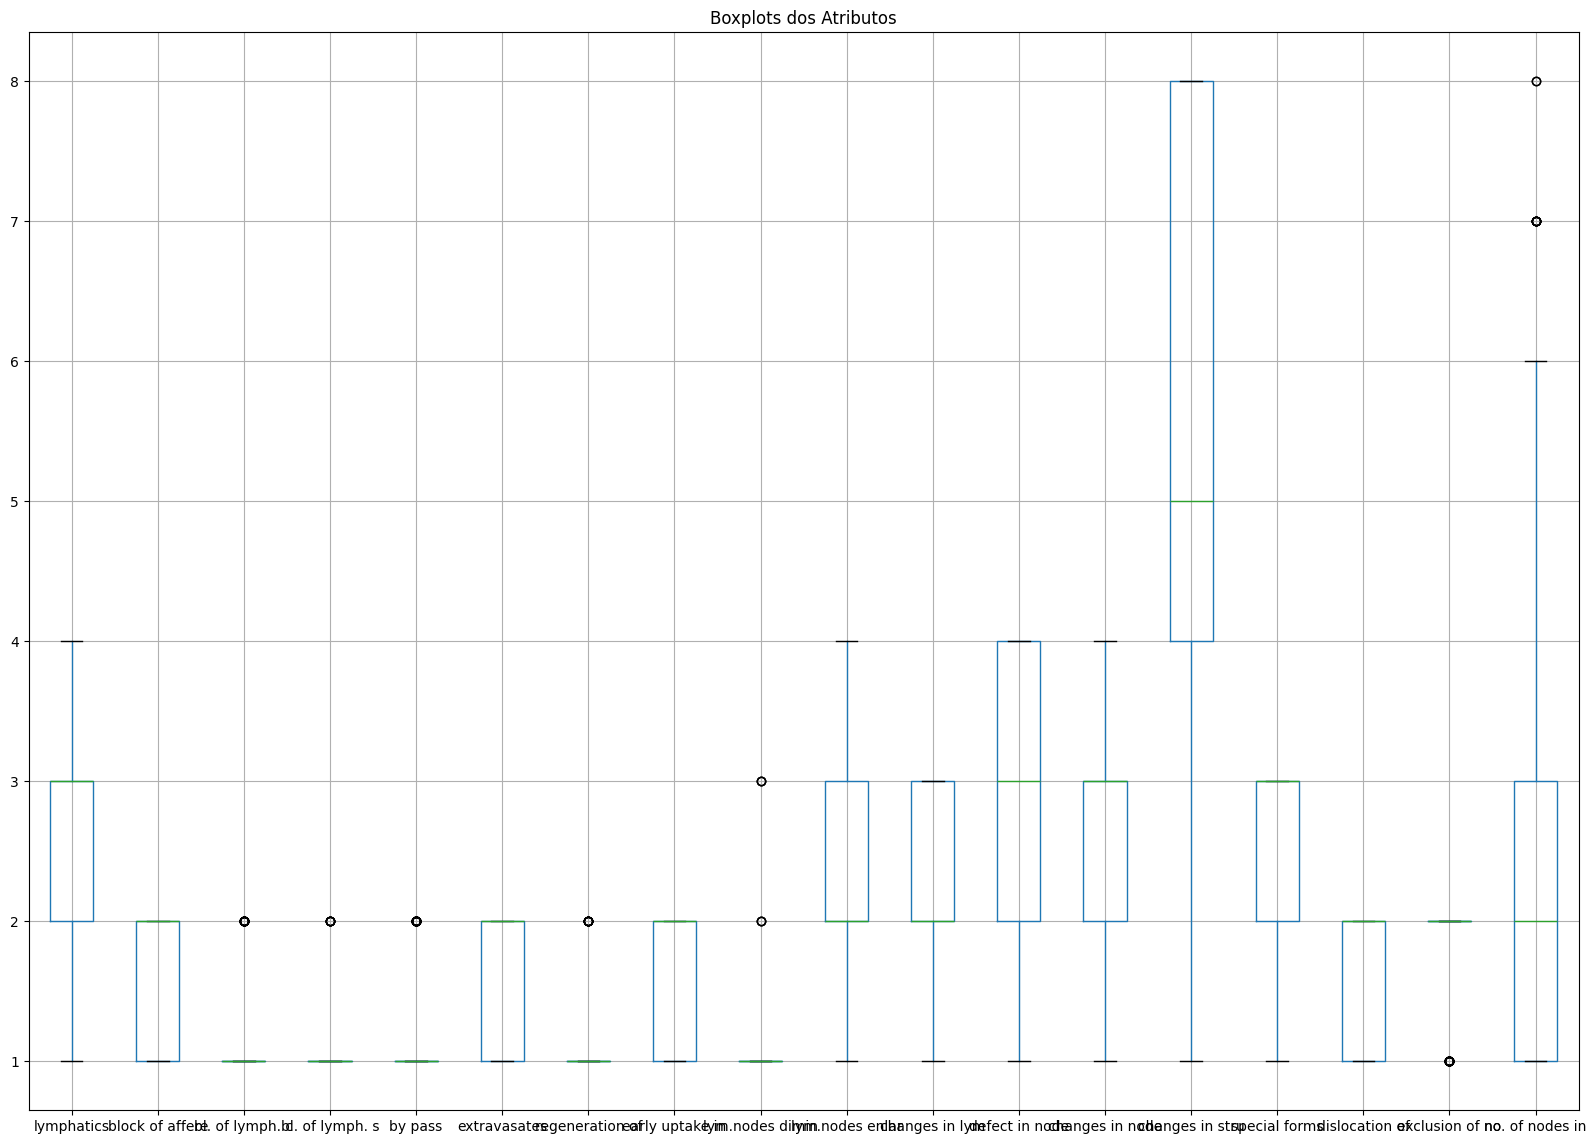

                   Curtose  Obliquidade
lymphatics       -1.135604     0.355663
block of affere  -1.978646    -0.219724
bl. of lymph. c   0.978435     1.722032
bl. of lymph. s  16.794822     4.309063
by pass          -0.545446     1.209177
extravasates     -2.026830    -0.027307
regeneration of  10.255955     3.481025
early uptake in  -1.213633    -0.896076
lym.nodes dimin  29.749465     5.442362
lym.nodes enlar  -0.504096     0.333795
changes in lym   -0.793145    -0.268961
defect in node   -1.259010    -0.123890
changes in node  -0.277793    -0.214188
changes in stru  -1.331199     0.089545
special forms    -1.044921    -0.654557
dislocation of   -1.541102    -0.692755
exclusion of no   0.082169    -1.442651
no. of nodes in   0.405021     1.203312


In [188]:
data.loc[:, data.columns != 'class'].hist(bins=10, figsize=(20, 14))
plot.suptitle("Histogramas dos Atributos")
plot.show()

plot.figure(figsize=(20, 14))
data.loc[:, data.columns != 'class'].boxplot(figsize=(20,14))
plot.title("Boxplots dos Atributos")
plot.show()

curt = data.loc[:, data.columns != 'class'].kurtosis();
obliq = data.loc[:, data.columns != 'class'].skew();

curt_obliq = pd.DataFrame({
    "Curtose": curt,
    "Obliquidade": obliq
})

print(curt_obliq)

#### 7. Identificação e separação do conjunto de teste, que será utilizado para testar o desempenho dos modelos – o conjunto de testes deve ser representativo e ter as características da população completa. Caso sua base de dados já tenha o conjunto de teste definido, analisar se este segue as características do conjunto de treinamento;

classe 1  -  2;
classe 2  - 81;
classe 3  - 61;
classe 4  -  4;

In [189]:
data_class1 = data[data['class'] == 1]
data_class2 = data[data['class'] == 2]
data_class3 = data[data['class'] == 3]
data_class4 = data[data['class'] == 4]

training_class1 = data_class1.iloc[:1]
training_class2 = data_class2.iloc[:41]
training_class3 = data_class3.iloc[:31]
training_class4 = data_class4.iloc[:2]

teste_class1 = data_class1.iloc[1:]
teste_class2 = data_class2.iloc[41:]
teste_class3 = data_class3.iloc[31:]
teste_class4 = data_class4.iloc[2:]

data_treino = pd.concat([training_class1, training_class2, training_class3, training_class4])
data_teste = pd.concat([teste_class1, teste_class2, teste_class3, teste_class4])

print(data_treino["class"].value_counts())
print(data_teste["class"].value_counts())


class
2    41
3    31
4     2
1     1
Name: count, dtype: int64
class
2    40
3    30
4     2
1     1
Name: count, dtype: int64


#### 8. Identificação e eliminação de atributos não necessários;

Todos os atributos são relacionados.

#### 9. Identificação e eliminação de exemplos não necessários;

In [190]:
data_treino.corr()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
class,1.000000,0.088455,-0.448453,-0.128091,0.313731,-0.072051,0.010558,0.386389,0.286295,0.410479,0.211874,-0.244114,0.100327,0.084374,0.354492,0.376109,0.164666,0.259781,0.519420
lymphatics,0.088455,1.000000,0.122680,-0.058697,0.104248,0.178134,0.206005,0.090707,0.143602,0.069881,0.159652,0.209761,0.194394,0.343904,-0.042464,0.138516,0.225704,0.192238,0.146063
block of affere,-0.448453,0.122680,1.000000,0.474222,0.185884,0.373293,0.416432,0.015959,0.028633,-0.096226,0.038454,0.235086,-0.115390,0.132793,-0.075205,-0.116228,-0.132572,-0.023829,-0.129649
bl. of lymph. c,-0.128091,-0.058697,0.474222,1.000000,0.391977,0.500680,0.332445,0.280458,0.034794,0.065775,0.148316,-0.010361,0.104651,0.099304,0.197941,-0.084288,0.023014,0.249478,0.123788
bl. of lymph. s,0.313731,0.104248,0.185884,0.391977,1.000000,0.306925,0.206864,0.636209,0.127294,0.336123,0.117865,-0.018566,0.025865,0.136237,0.234016,-0.010715,0.144338,0.097790,0.401859
by pass,-0.072051,0.178134,0.373293,0.500680,0.306925,1.000000,0.442643,0.383026,0.092737,0.175307,0.180954,0.202515,0.187322,0.168178,0.000177,0.091581,0.102233,0.170190,0.212607
extravasates,0.010558,0.206005,0.416432,0.332445,0.206864,0.442643,1.000000,0.141795,-0.038014,0.077849,0.320055,0.304427,0.220078,0.226309,-0.115431,0.286528,0.018858,0.267391,0.159580
regeneration of,0.386389,0.090707,0.015959,0.280458,0.636209,0.383026,0.141795,1.000000,-0.004083,0.442555,0.077967,-0.211575,0.095104,0.061183,0.121954,0.083411,0.032410,0.153707,0.453763
early uptake in,0.286295,0.143602,0.028633,0.034794,0.127294,0.092737,-0.038014,-0.004083,1.000000,-0.110022,0.404574,0.107365,-0.079019,0.178377,0.104318,0.305536,0.188982,0.158522,0.343856
lym.nodes dimin,0.410479,0.069881,-0.096226,0.065775,0.336123,0.175307,0.077849,0.442555,-0.110022,1.000000,-0.395978,-0.339544,0.028453,-0.278323,0.188596,-0.110015,-0.079388,0.107572,0.184588


Todos os exemplos possuem correlação com a classificação.

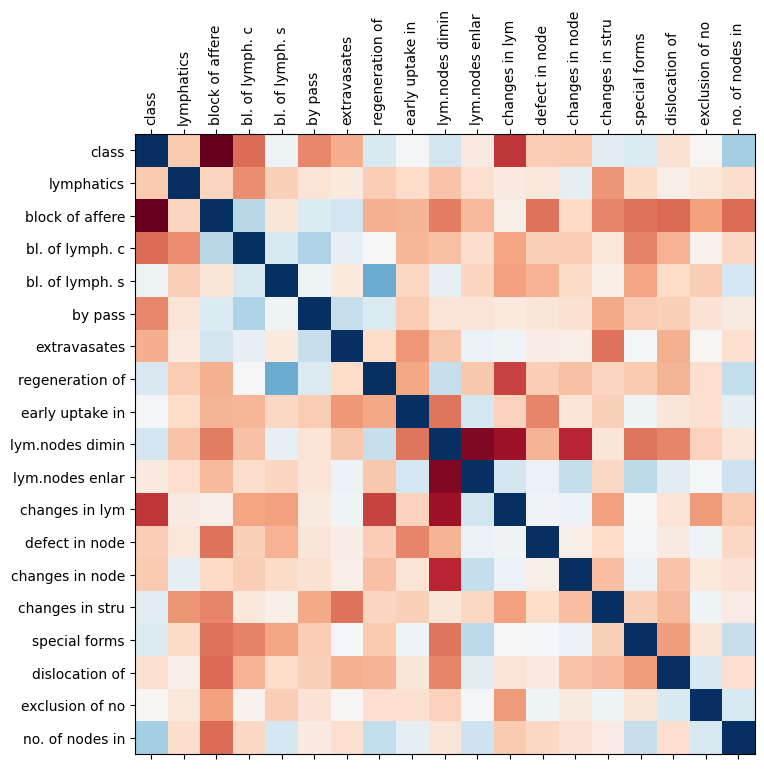

In [191]:
corr = data_treino.corr();
fig = plot.figure(figsize=(8,8))
plot.matshow(corr, cmap="RdBu", fignum=fig.number)
plot.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plot.yticks(range(len(corr.columns)), corr.columns);

#### 10. Análise e aplicação de técnicas de amostragem de dados (caso não seja necessário, analisar o porquê);

A população é relativamente pequena, podemos utilizá-la por completo.

#### 11. Identificação e aplicação de técnicas para minimizar problemas de desbalanceamento (caso não seja necessário, analisar o porquê);

Como a base está muito desbalanceda, não faz sentido utilizar métodos de remoção de majoritários nem adição de minoritários. Acredito que a melhor opção seja atribuir um peso maior para os atributos das classes muito minoritárias, assim permitindo que quando encontrarmos parametros que levem a classificação como uma dessas classes, não tenha um vies muito forte.

#### 12. Limpeza de dados: a. Identificação e eliminação de ruídos ou outliers; b. Identificação e eliminação de dados inconsistentes; c. Identificação e eliminação de dados redundantes; d. Identificação e resolução de dados incompletos (ausentes) – utilização de alguma técnica de preenchimento e justificar;

Base não possui dados incompletos ou incosistentes.

In [192]:
data_treino = data_treino.drop_duplicates()

def remover_outliers(df, coluna):
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    IQR = q3 - q1
    inferior = q1 - 1.5 * IQR
    superior = q3 + 1.5 * IQR
    outliers = df[(df[coluna] >= inferior) & (df[coluna] <= superior)]
    return outliers

atributos_quantitativos = ["lym.nodes dimin", "lym.nodes enlar", "no. of nodes in"]
for coluna in atributos_quantitativos:
    data_treino = remover_outliers(data_treino, coluna)

print(data_treino.describe())

           class  lymphatics  block of affere  bl. of lymph. c  \
count  67.000000   67.000000        67.000000        67.000000   
mean    2.373134    2.835821         1.567164         1.194030   
std     0.517448    0.845613         0.499208         0.398437   
min     1.000000    1.000000         1.000000         1.000000   
25%     2.000000    2.000000         1.000000         1.000000   
50%     2.000000    3.000000         2.000000         1.000000   
75%     3.000000    4.000000         2.000000         1.000000   
max     3.000000    4.000000         2.000000         2.000000   

       bl. of lymph. s    by pass  extravasates  regeneration of  \
count             67.0  67.000000     67.000000        67.000000   
mean               1.0   1.268657      1.492537         1.029851   
std                0.0   0.446606      0.503718         0.171460   
min                1.0   1.000000      1.000000         1.000000   
25%                1.0   1.000000      1.000000         1.000000 

#### 13. Identificação e conversão dos tipos de dados (caso não seja necessário, analisar o porquê). Os tipos de conversão que podem ser utilizados são: a. Conversão de tipos (simbólico para numérico, ordinal para numérico, nominal para binário, numérico para ordinal); b. Normalização dos dados (re-escala ou padronização);

Os dados ja estão convertidos numéricos ou em escala normalizada.

#### 14. Análise e aplicação de alguma técnica para redução de dimensionalidade – pesquisar alguma técnica utilizada na literatura e aplicar;

#### 15. Definição da técnica de validação a ser utilizada (cross-validation, hold-out, leave-one-out, etc);

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier

# Utilizando validação cruzada estratificada
x = data_treino.drop(columns=["class"])
y = data_treino["class"]

# Quantidade de dobras
k = 5
dobras = []

for label in np.unique(y):
    label_indices = np.where(y == label)[0]
    np.random.shuffle(label_indices)
    split_folds = np.array_split(label_indices, k)
    for i in range(k):
        if len(dobras) < i + 1:
            dobras.append([])
        dobras[i].extend(split_folds[i])

# Setup Majoritaria
accuracies = []
recalls = []
precisions = []
confusion_matrix = [];

# Setup KNN
k_knn = 5
knn = KNeighborsClassifier(n_neighbors=k_knn)
knn_accuracies = []
knn_recalls = []
knn_precisions = []
confusion_matrix_knn = [];

#Setup Arvore
random_state = 42
decision_tree = DecisionTreeClassifier(random_state = random_state)
dt_accuracies = []
dt_recalls = []
dt_precisions = []
confusion_matrix_dt = [];

#Setup MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state = random_state)
mlp_accuracies = []
mlp_recalls = []
mlp_precisions = []
confusion_matrix_mlp = [];

#### 16. Definição das métricas a serem utilizadas para avaliar os resultados preditivos dos modelos (acurácia, precisão, recall, matriz de confusão, etc);

In [194]:
def matriz_confusao(y_true, y_pred):
    classes = [1,2,3,4]
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true-1, pred-1] += 1
    
    return matrix

def preditivo(y_true, y_pred):
    matriz = matriz_confusao(y_true, y_pred)
    classes = matriz.shape[0]

    acuracia = np.trace(matriz) / np.sum(matriz)

    precisao_classes = []
    recall_classes = []

    for i in range(classes):
        TP = matriz[i,i]
        FP = np.sum(matriz[:,i]) - TP
        FN = np.sum(matriz[i,:]) - TP

        precisao = TP/(TP+FP) if (TP+FP)!=0 else 0
        precisao_classes.append(precisao)

        recall = TP/(TP+FN) if (TP+FN)!=0 else 0
        recall_classes.append(recall)

    return acuracia, recall_classes, precisao_classes, matriz


#### 17. Definição de um algoritmo base (baseline), que será utilizado como base para análise dos resultados – algoritmo classe majoritária;

#### 18. Criação de modelo preditivo utilizando algoritmo de indução baseado nos vizinhos mais próximos e similaridade de dados (K-NN);

#### 19. Criação de modelo preditivo utilizando algoritmo de indução baseado em árvores de decisão (decision tree ou árvore C4.5);

#### 20. Criação de modelo preditivo utilizando algoritmo de indução redes neurais artificiais (MLP);

In [195]:
for i in range(k):
    # Definir índices de treino e teste
    test_indices = np.array(dobras[i])
    train_indices = np.array([idx for j in range(k) if j != i for idx in dobras[j]])
    
    # Separar dados de treino e teste
    X_train, X_test = x.iloc[train_indices], x.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    #Algoritmo Classe Majoritária
    classe_majoritaria = y_train.mode()[0]
    y_pred = [classe_majoritaria] * len(y_test)
    accuracy, recalls, precisions, confusion_matrix = preditivo(y_test, y_pred)
    accuracies.append(accuracy)
    
    #Algoritmo KNN
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_accuracy, knn_recalls, knn_precisions, confusion_matrix_knn = preditivo(y_test, y_pred_knn)
    knn_accuracies.append(knn_accuracy)

    #Algoritmo Arovre de Decisão
    decision_tree.fit(X_train, y_train)
    y_pred_dt = decision_tree.predict(X_test)
    dt_accuracy, dt_recalls, dt_precisions, confusion_matrix_dt = preditivo(y_test, y_pred_dt)
    dt_accuracies.append(dt_accuracy)

    #Algoritmo MLP
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    mlp_accuracy, mlp_recalls, mlp_precisions, confusion_matrix_mlp = preditivo(y_test, y_pred_mlp)
    mlp_accuracies.append(mlp_accuracy)


c:\Users\Rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Rafael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the 


#### 21. Análise dos resultados do algoritmo baseline;

Média da Acurácia Majoritária: 0.60
Recall Majoritária por Classe: [0, np.float64(1.0), np.float64(0.0), 0]
Precisão Majoritária por Classe: [0, np.float64(0.6153846153846154), 0, 0]
Matriz de Confusão:
[[0 0 0 0]
 [0 8 0 0]
 [0 5 0 0]
 [0 0 0 0]]


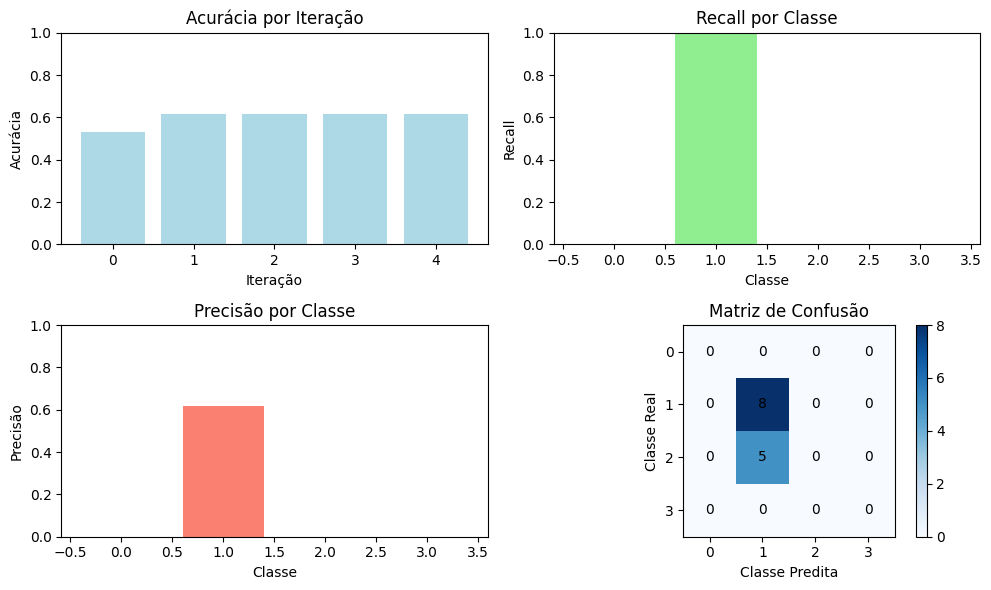

In [196]:
# Média da Acurácia
# Cálculo da média de acurácia
mean_accuracy = np.mean(accuracies)

# Exibição dos resultados com formatação
print(f"\033[1mMédia da Acurácia Majoritária:\033[0m {mean_accuracy:.2f}")
print(f"\033[1mRecall Majoritária por Classe:\033[0m {recalls}")
print(f"\033[1mPrecisão Majoritária por Classe:\033[0m {precisions}")
print(f"\033[1mMatriz de Confusão:\033[0m\n{np.array(confusion_matrix)}")

# Gráfico da Acurácia
plot.figure(figsize=(10, 6))

# Gráfico de barras para acurácia
plot.subplot(2, 2, 1)
plot.bar(range(len(accuracies)), accuracies, color='lightblue')
plot.ylim(0, 1)
plot.title("Acurácia por Iteração")
plot.xlabel("Iteração")
plot.ylabel("Acurácia")

# Gráfico de barras para Recall por classe
plot.subplot(2, 2, 2)
plot.bar(range(len(recalls)), recalls, color='lightgreen')
plot.ylim(0, 1)
plot.title("Recall por Classe")
plot.xlabel("Classe")
plot.ylabel("Recall")

# Gráfico de barras para Precisão por classe
plot.subplot(2, 2, 3)
plot.bar(range(len(precisions)), precisions, color='salmon')
plot.ylim(0, 1)
plot.title("Precisão por Classe")
plot.xlabel("Classe")
plot.ylabel("Precisão")

# Gráfico de matriz de confusão
plot.subplot(2, 2, 4)
plot.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plot.title("Matriz de Confusão")
plot.colorbar()
plot.xlabel('Classe Predita')
plot.ylabel('Classe Real')

for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix[0])):
        plot.text(j, i, str(confusion_matrix[i][j]), ha='center', va='center', color="black")

plot.tight_layout()
plot.show()

#### 22. Análise dos resultados dos três algoritmos de aprendizado de máquina supracitados;

Média da Acurácia KNN: 0.84
Recall KNN por Classe: [0, np.float64(0.875), np.float64(0.8), 0]
Precisão KNN por Classe: [0, np.float64(0.875), np.float64(0.8), 0]
Matriz de Confusão KNN:
[[0 0 0 0]
 [0 7 1 0]
 [0 1 4 0]
 [0 0 0 0]]

Média da Acurácia Árvore de Decisão: 0.81
Recall Árvore de Decisão por Classe: [0, np.float64(0.875), np.float64(1.0), 0]
Precisão Árvore de Decisão por Classe: [0, np.float64(1.0), np.float64(0.8333333333333334), 0]
Matriz de Confusão Árvore de Decisão:
[[0 0 0 0]
 [0 7 1 0]
 [0 0 5 0]
 [0 0 0 0]]

Média da Acurácia MLP: 0.91
Recall MLP por Classe: [0, np.float64(0.875), np.float64(0.6), 0]
Precisão MLP por Classe: [0, np.float64(0.7777777777777778), np.float64(0.75), 0]
Matriz de Confusão MLP:
[[0 0 0 0]
 [0 7 1 0]
 [0 2 3 0]
 [0 0 0 0]]



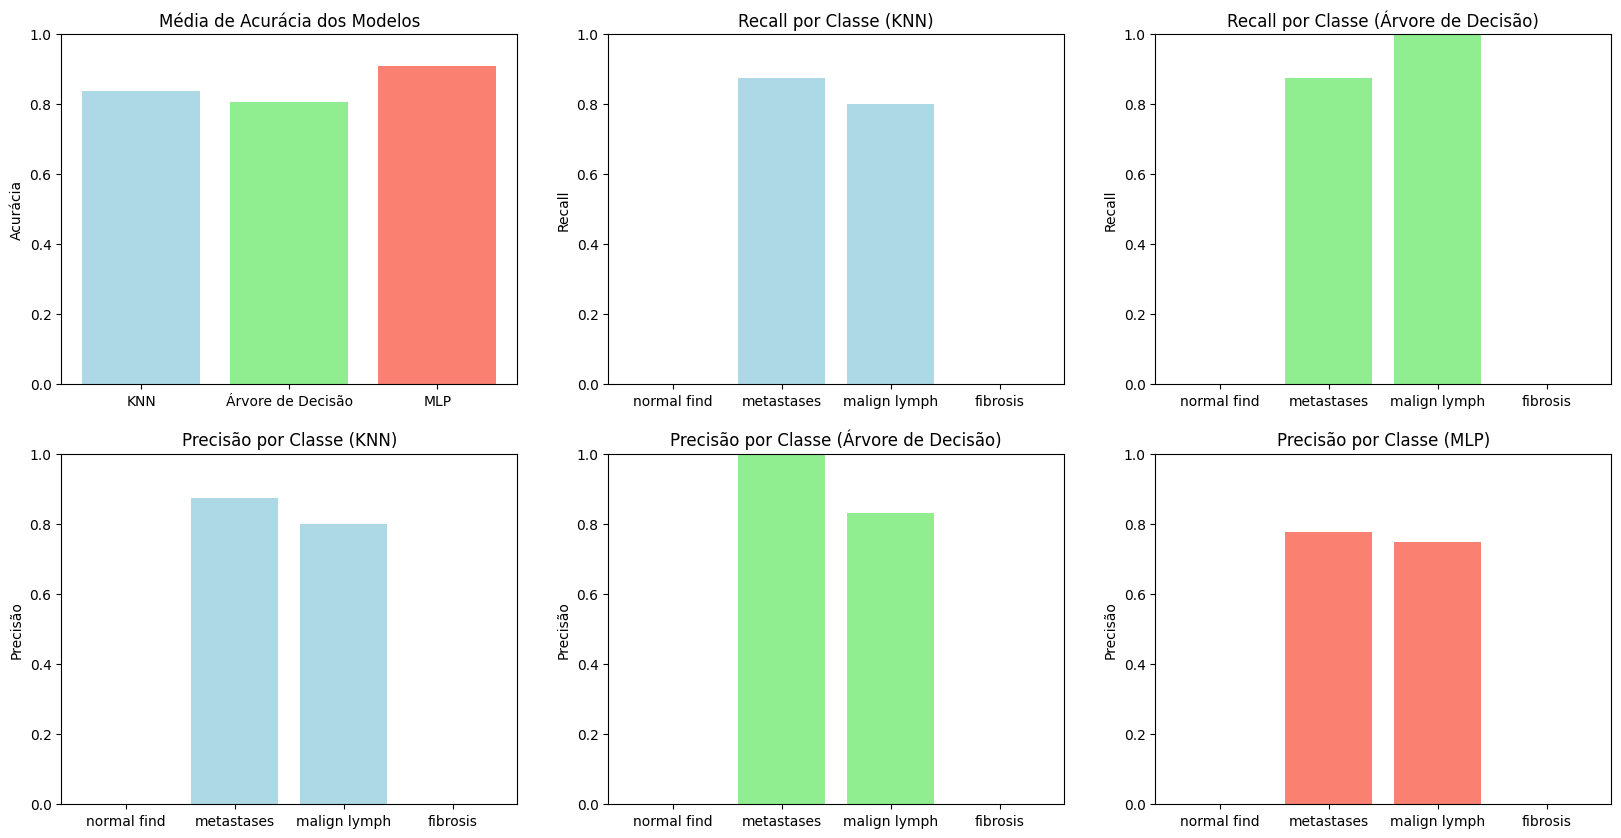

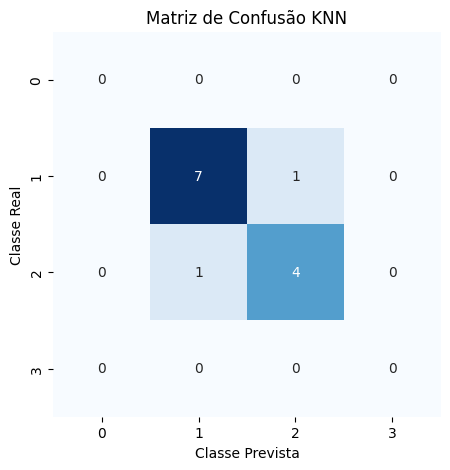

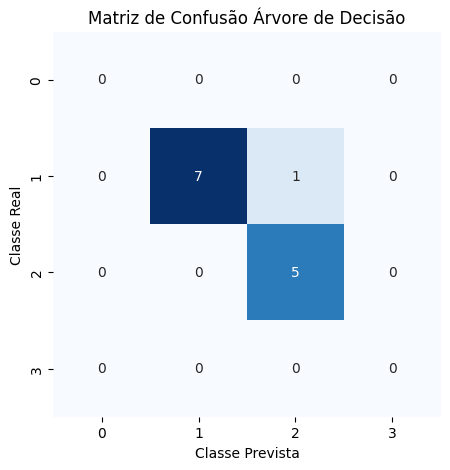

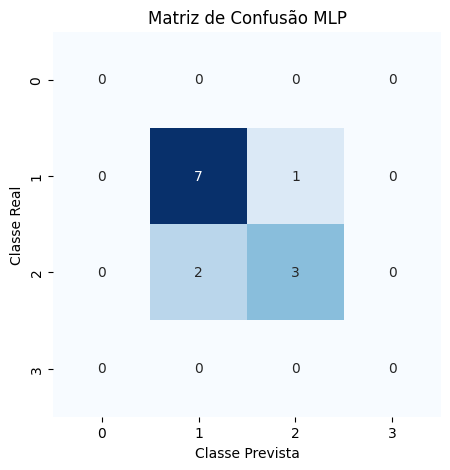

<Figure size 640x480 with 0 Axes>

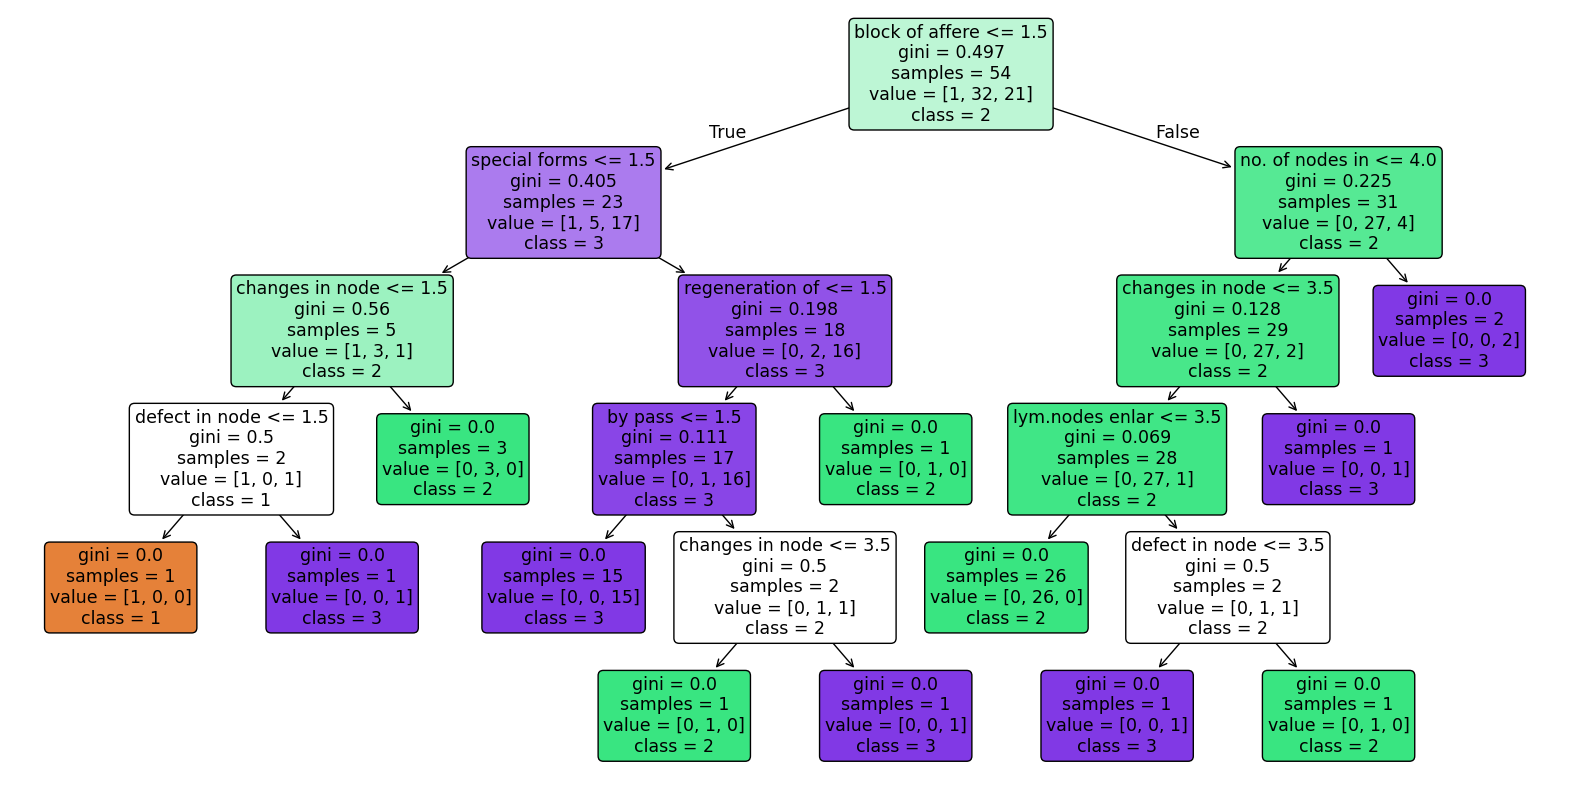

In [197]:
# Cálculo da média de acurácia
mean_knn_accuracy = np.mean(knn_accuracies)
mean_dt_accuracy = np.mean(dt_accuracies)
mean_mlp_accuracy = np.mean(mlp_accuracies)

# Exibição dos resultados com formatação
print(f"\033[1mMédia da Acurácia KNN:\033[0m {mean_knn_accuracy:.2f}")
print(f"\033[1mRecall KNN por Classe:\033[0m {knn_recalls}")
print(f"\033[1mPrecisão KNN por Classe:\033[0m {knn_precisions}")
print(f"\033[1mMatriz de Confusão KNN:\033[0m\n{np.array(confusion_matrix_knn)}\n")

print(f"\033[1mMédia da Acurácia Árvore de Decisão:\033[0m {mean_dt_accuracy:.2f}")
print(f"\033[1mRecall Árvore de Decisão por Classe:\033[0m {dt_recalls}")
print(f"\033[1mPrecisão Árvore de Decisão por Classe:\033[0m {dt_precisions}")
print(f"\033[1mMatriz de Confusão Árvore de Decisão:\033[0m\n{np.array(confusion_matrix_dt)}\n")

print(f"\033[1mMédia da Acurácia MLP:\033[0m {mean_mlp_accuracy:.2f}")
print(f"\033[1mRecall MLP por Classe:\033[0m {mlp_recalls}")
print(f"\033[1mPrecisão MLP por Classe:\033[0m {mlp_precisions}")
print(f"\033[1mMatriz de Confusão MLP:\033[0m\n{np.array(confusion_matrix_mlp)}\n")

# Gráficos
plot.figure(figsize=(20, 10))

# Gráficos de acurácia
plot.subplot(2, 3, 1)
plot.bar(['KNN', 'Árvore de Decisão', 'MLP'], [mean_knn_accuracy, mean_dt_accuracy, mean_mlp_accuracy], color=['lightblue', 'lightgreen', 'salmon'])
plot.ylim(0, 1)
plot.title("Média de Acurácia dos Modelos")
plot.ylabel("Acurácia")

# Gráficos de recall
plot.subplot(2, 3, 2)
plot.bar(['normal find', 'metastases', 'malign lymph', 'fibrosis'], knn_recalls, color='lightblue')
plot.ylim(0, 1)
plot.title("Recall por Classe (KNN)")
plot.ylabel("Recall")

plot.subplot(2, 3, 3)
plot.bar(['normal find', 'metastases', 'malign lymph', 'fibrosis'], dt_recalls, color='lightgreen')
plot.ylim(0, 1)
plot.title("Recall por Classe (Árvore de Decisão)")
plot.ylabel("Recall")

# Gráficos de precisão
plot.subplot(2, 3, 4)
plot.bar(['normal find', 'metastases', 'malign lymph', 'fibrosis'], knn_precisions, color='lightblue')
plot.ylim(0, 1)
plot.title("Precisão por Classe (KNN)")
plot.ylabel("Precisão")

plot.subplot(2, 3, 5)
plot.bar(['normal find', 'metastases', 'malign lymph', 'fibrosis'], dt_precisions, color='lightgreen')
plot.ylim(0, 1)
plot.title("Precisão por Classe (Árvore de Decisão)")
plot.ylabel("Precisão")

plot.subplot(2, 3, 6)
plot.bar(['normal find', 'metastases', 'malign lymph', 'fibrosis'], mlp_precisions, color='salmon')
plot.ylim(0, 1)
plot.title("Precisão por Classe (MLP)")
plot.ylabel("Precisão")

# Função para plotar matriz de confusão
def plot_confusion_matrix(cm, title):
    plot.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plot.title(title)
    plot.ylabel('Classe Real')
    plot.xlabel('Classe Prevista')
    plot.show()

# Plotando as matrizes de confusão para cada modelo
plot_confusion_matrix(confusion_matrix_knn, "Matriz de Confusão KNN")
plot_confusion_matrix(confusion_matrix_dt, "Matriz de Confusão Árvore de Decisão")
plot_confusion_matrix(confusion_matrix_mlp, "Matriz de Confusão MLP")

plot.tight_layout()
plot.show()

# Visualização da árvore de decisão
plot.figure(figsize=(20,10))
tree.plot_tree(decision_tree, filled=True, feature_names=x.columns, class_names=np.unique(y).astype(str), rounded=True)
plot.show()